# Data Preparation and Visualization

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [9]:
start = '1984-09-07'
end = '2024-09-07'
stock = 'BK'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [10]:
data.reset_index(inplace=True)

In [11]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1984-09-07,2.616865,2.638948,2.583740,2.583740,0.900330,341888
1,1984-09-10,2.583740,2.605823,2.572698,2.605823,0.908024,69057
2,1984-09-11,2.605823,2.616865,2.594781,2.594781,0.904176,246793
3,1984-09-12,2.583740,2.583740,2.561656,2.583740,0.900330,131321
4,1984-09-13,2.583740,2.649989,2.528532,2.649989,0.923415,1155854
...,...,...,...,...,...,...,...
10075,2024-08-30,67.339996,68.370003,67.120003,68.220001,68.220001,4352000
10076,2024-09-03,67.849998,68.309998,67.570000,67.889999,67.889999,3259200
10077,2024-09-04,68.239998,68.540001,67.580002,67.739998,67.739998,2942700
10078,2024-09-05,68.260002,68.489998,67.400002,68.000000,68.000000,3850100


In [12]:
ma_100_days = data.Close.rolling(100).mean()

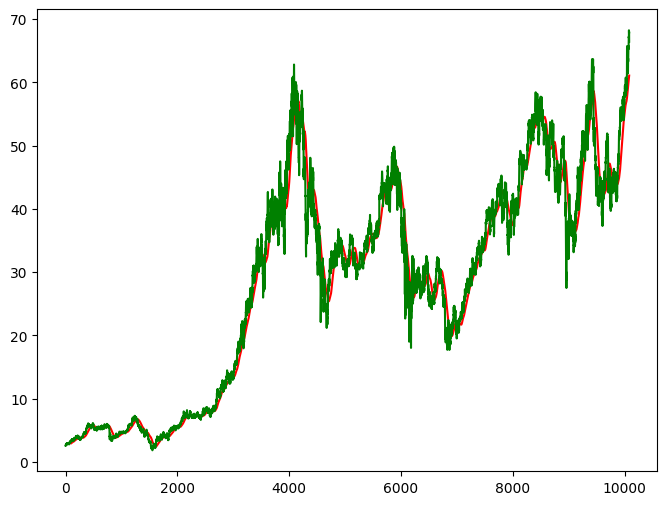

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [14]:
ma_200_days = data.Close.rolling(200).mean()

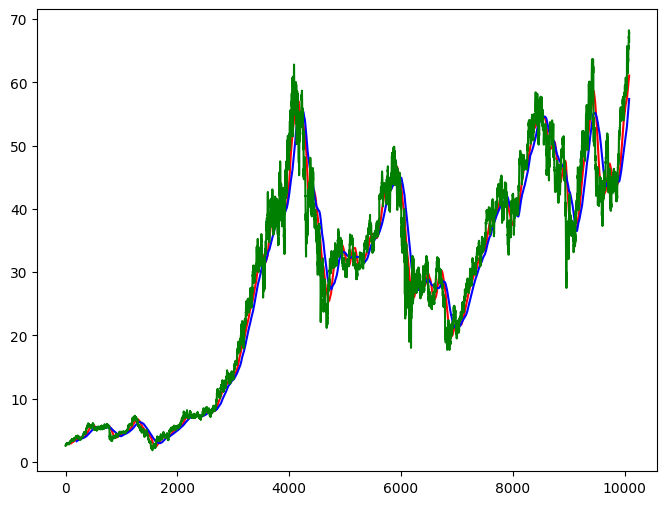

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [16]:
data.dropna(inplace=True)

In [17]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])

In [18]:
data_train.shape[0]

8064

In [19]:
data_test.shape[0]

2016

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [21]:
data_train_scale = scaler.fit_transform(data_train)

In [22]:
X = []
y = []

for i in range(100, data_train_scale.shape[0]):
    X.append(data_train_scale[i-100: i])
    y.append(data_train_scale[i, 0])

In [24]:
X, y = np.array(X), np.array(y)

# Model Creation

In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 81s 302ms/step - loss: 0.0387
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 75s 299ms/step - loss: 0.0051
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 81s 296ms/step - loss: 0.0040
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 85s 310ms/step - loss: 0.0039
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 78s 294ms/step - loss: 0.0033
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 77s 308ms/step - loss: 0.0030
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 78s 291ms/step - loss: 0.0028
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 73s 293ms/step - loss: 0.0026
Epoch 9/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 85s 304ms/step - loss: 0.0024
Epoch 10/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 78s 290ms/step - loss: 0.0022
Epoch 11/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 75s 303ms/step - loss: 0.0021
Epoch 12/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 79s 289ms/step - loss: 0.0021
Epoch 13/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 84s 297ms/step - loss: 0.0020
Epoch 14/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 73s 292ms/step - loss: 0.0021
Epoch 15/50
249